In [1]:
import http
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import time
from time import sleep
import datetime
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import tree
%matplotlib inline
from sklearn.datasets import make_regression
from tqdm import tqdm

Here we normelaized the data to Test it's effect on our data

In [2]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

In [3]:
df=pd.read_csv("newYorkBookingPartB.csv")
df

,TTT,LOS,Hotel Name,Price,Reviews,Score,prepayment,typeBed,DistanceFromCenter,Stars,...,Locatins_New York,Locatins_Newport,Locatins_NoMad,Locatins_SoHo,Locatins_Tribeca,Locatins_Union Square,Locatins_Upper East Side,Locatins_Upper West Side,Locatins_Wall Street - Financial District,Locatins_Williamsburg
0,1,1,Pestana Park Avenue,255.64,821,8.5,1,0,1900,4,...,0,0,0,0,0,0,0,0,0,0
1,1,1,The Cloud One New York-Downtown,214.48,571,8.3,1,8,7000,4,...,0,0,0,0,0,0,0,0,1,0
2,1,1,TownePlace Suites by Marriott New York Manhatt...,286.44,2408,8.1,1,8,2500,4,...,0,0,0,0,0,0,0,0,0,0
3,1,1,Pod Times Square,255.64,12852,8.1,1,1,1400,4,...,0,0,0,0,0,0,0,0,0,0
4,1,1,Hampton Inn Manhattan Times Square North,317.24,2669,7.8,1,7,600,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48973,30,5,Hyatt Place New York/Midtown-South,1925.56,2159,8.1,1,8,2000,4,...,0,0,0,0,0,0,0,0,0,0
48974,30,5,W New York - Union Square,2157.96,167,7.6,1,8,3500,5,...,0,0,0,0,0,1,0,0,0,0
48975,30,5,Fitzpatrick Grand Central,1489.04,385,8.2,0,9,1800,4,...,0,0,0,0,0,0,0,0,0,0
48976,30,5,"voco Times Square South, an IHG Hotel",1461.88,1439,7.7,0,8,1800,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import MinMaxScaler
cols_to_normalize = [0,1, 3, 4, 5,7, 8, 9,10, 11, 12]
scaler = MinMaxScaler()
df.iloc[:, cols_to_normalize] = scaler.fit_transform(df.iloc[:, cols_to_normalize])

In [5]:

X1 =df.drop(['Price','Hotel Name'],axis = 1)
y1 = df['Price']


In [6]:
X1.columns

Index(['TTT', 'LOS', 'Reviews', 'Score', 'prepayment', 'typeBed',
       'DistanceFromCenter', 'Stars', 'Index', 'day_of_week_chek_in',
       'day_of_week_chek_out', 'Locatins_Battery Park', 'Locatins_Boerum Hill',
       'Locatins_Chelsea', 'Locatins_Chinatown', 'Locatins_Downtown Brooklyn',
       'Locatins_Downtown Jersey City', 'Locatins_East Harlem',
       'Locatins_East Village', 'Locatins_Flatiron District',
       'Locatins_Gramercy', 'Locatins_Greenwich Village', 'Locatins_Harlem',
       'Locatins_Hell's Kitchen', 'Locatins_Hoboken', 'Locatins_Hudson Yards',
       'Locatins_Jersey City', 'Locatins_Kips Bay',
       'Locatins_Long Island City', 'Locatins_Lower East Side',
       'Locatins_Manhattan', 'Locatins_Midtown East', 'Locatins_Murray Hill',
       'Locatins_New York', 'Locatins_Newport', 'Locatins_NoMad',
       'Locatins_SoHo', 'Locatins_Tribeca', 'Locatins_Union Square',
       'Locatins_Upper East Side', 'Locatins_Upper West Side',
       'Locatins_Wall Street - 

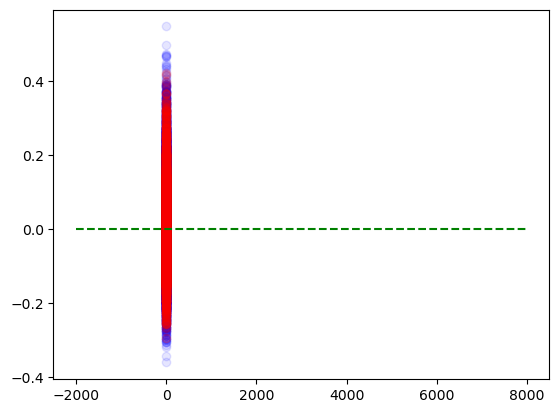

r^2 Train  0.8479217449323982
r^2 Test  0.8533979104554086
MSE Test  0.006663235429513584
MSE Train  0.006875348050178296
MAE Test:  0.06181463326337149
MAE Train:  0.06247928987754558
RMSE Test:  0.08162864343791089
RMSE Train:  0.08291771855386694


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

lreg = LinearRegression()
lreg.fit(X_train,y_train)
c=lreg.intercept_
M=lreg.coef_
pred_test = lreg.predict(X_test)
pred_train = lreg.predict(X_train)
train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
plt.hlines(y=0, xmin=-2000, xmax=8000, color='green', linestyle='--')
plt.show()
print("r^2 Train ",r2_score(y_train,pred_train))
print("r^2 Test ",r2_score(y_test,pred_test))

print('MSE Test ',np.mean((pred_test-y_test)**2))
print('MSE Train ',np.mean((pred_train-y_train)**2))

print('MAE Test: ',mean_absolute_error(y_test,pred_test))
print('MAE Train: ',mean_absolute_error(y_train,pred_train))

print('RMSE Test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,pred_train)))




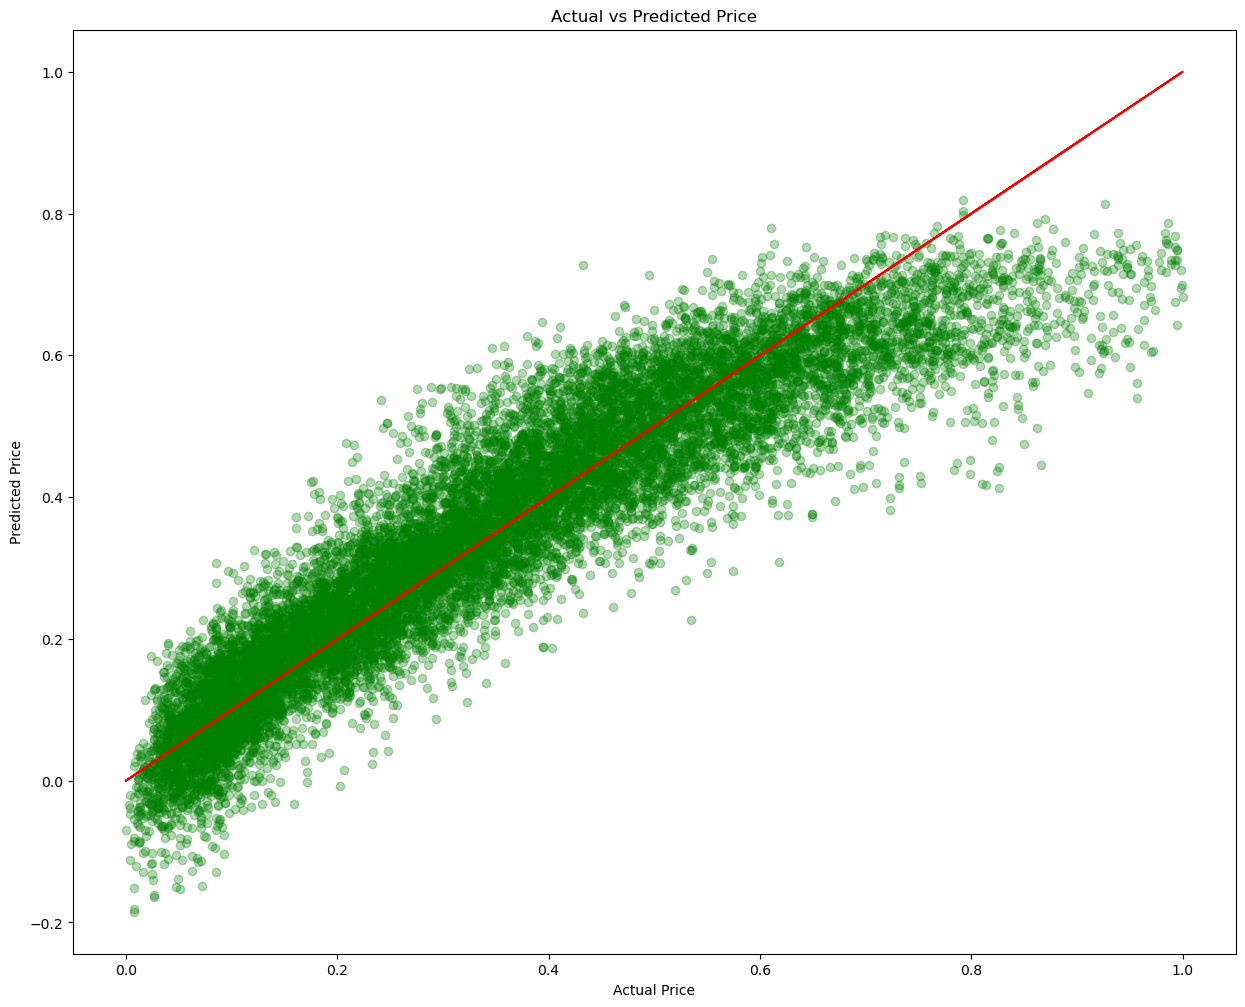

In [8]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)
plt.figure(figsize=(15,12))
pred_test = lreg.predict(X_test)
plt.scatter(y_test,pred_test, color ='green' , alpha = 0.3)
plt.plot(y_test,y_test , color = 'red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


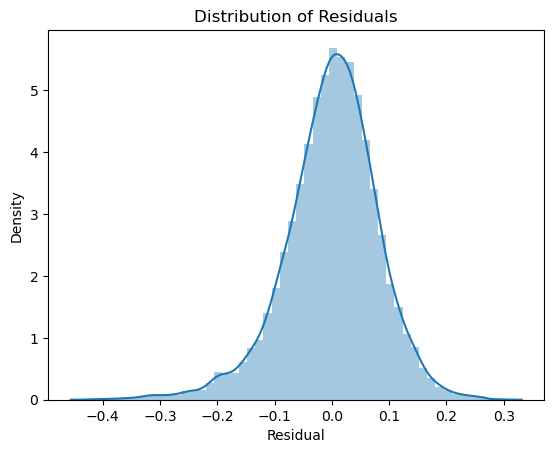

In [9]:

sns.distplot(pred_test- y_test, hist=True, kde=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals');



r^2 Train  0.9271053443893659
r^2 Test  0.9116452671836399
MSE Test  0.004015825339843516
MSE Train  0.003295514721011282
MAE Test:  0.04473191509312342
MAE Train:  0.03974378353340428
RMSE Test:  0.0633705399996206
RMSE Train:  0.05740657384839552


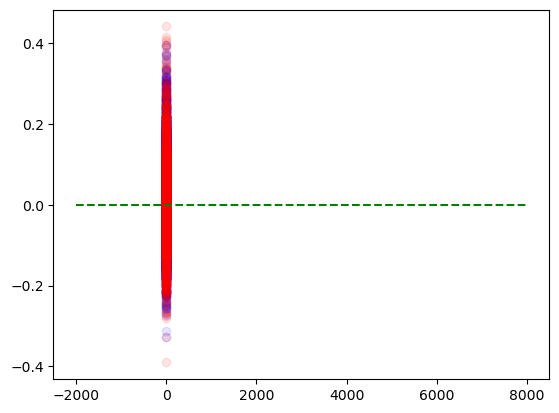

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

DecisionTree = tree.DecisionTreeRegressor(max_depth=11)
DecisionTree.fit(X_train,y_train)
pred_test = DecisionTree.predict(X_test)
pred_train = DecisionTree.predict(X_train)
train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
plt.hlines(y=0, xmin=-2000, xmax=8000, color='green', linestyle='--')

print("r^2 Train ",r2_score(y_train,pred_train))
print("r^2 Test ",r2_score(y_test,pred_test))

print('MSE Test ',np.mean((pred_test-y_test)**2))
print('MSE Train ',np.mean((pred_train-y_train)**2))

print('MAE Test: ',mean_absolute_error(y_test,pred_test))
print('MAE Train: ',mean_absolute_error(y_train,pred_train))

print('RMSE Test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,pred_train)))

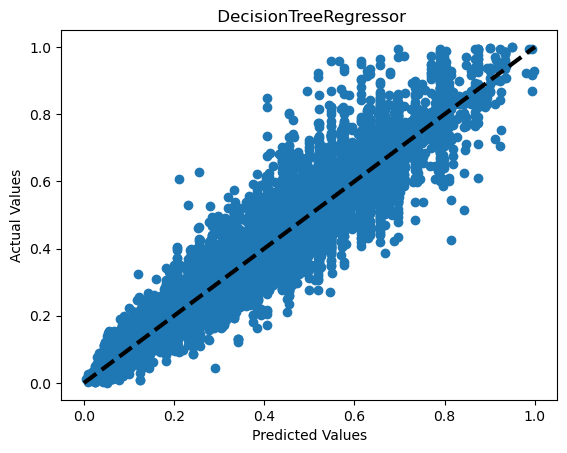

In [11]:
fig, ax = plt.subplots()
ax.scatter(pred_test, y_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title(' DecisionTreeRegressor')
plt.show()

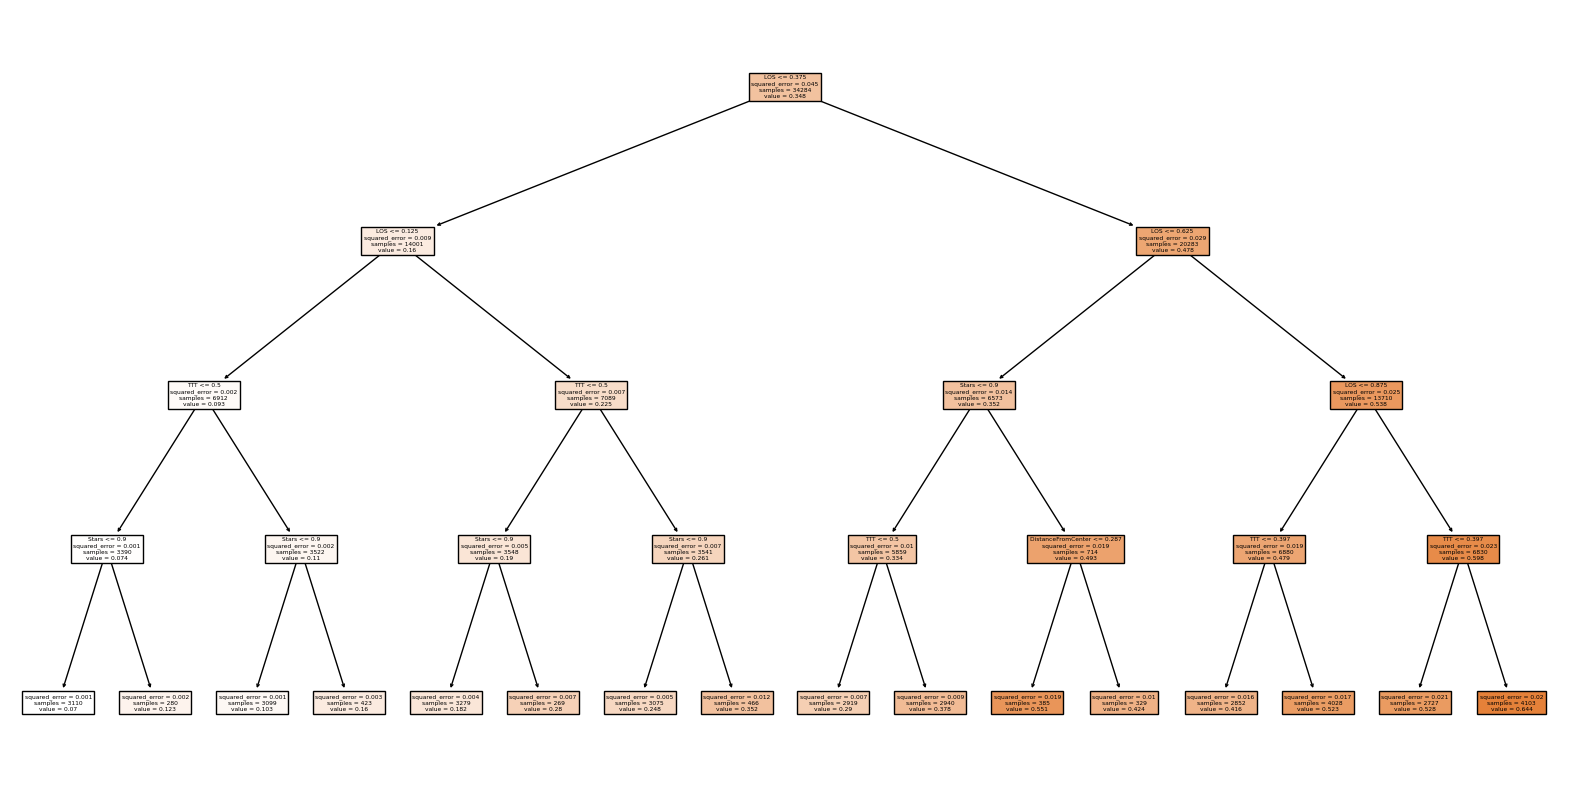

In [12]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
DecisionTree = DecisionTreeRegressor(max_depth=4)
DecisionTree.fit(X_train, y_train)
pred_test = DecisionTree.predict(X_test)
plt.figure(figsize=(20,10))
plot_tree(DecisionTree,feature_names=list(X1.columns),filled=True);

C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


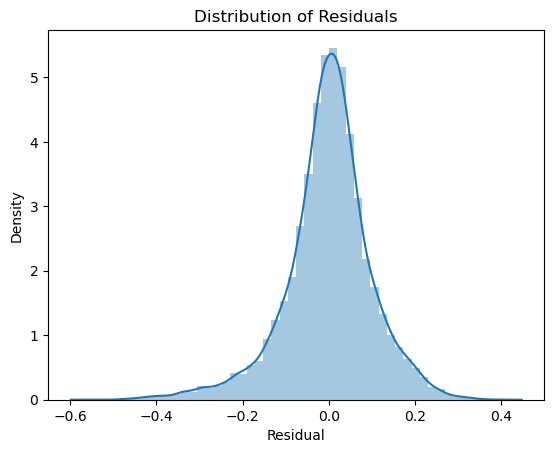

In [13]:
sns.distplot(pred_test- y_test, hist=True, kde=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals');

# from sklearn.tree import DecisionTreeRegressor, plot_tree
# DecisionTree = DecisionTreeRegressor(max_depth=4)
# DecisionTree.fit(X_train, y_train)
# y_pred = DecisionTree.predict(X_test)

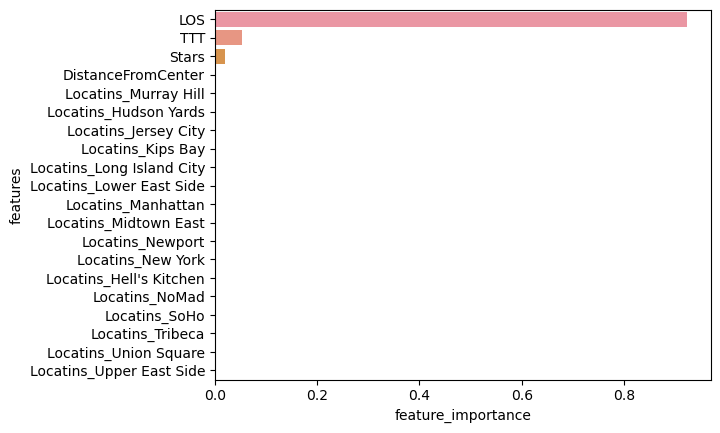

In [14]:
plot_features(X_train.columns, DecisionTree.feature_importances_)

C:\Users\amitb\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


r^2 Train  0.938951136278568
r^2 Test  0.9269711126584447
MSE Test  0.003319247843082062
MSE Train  0.002759975027108046
MAE Test:  0.040712208662237265
MAE Train:  0.03687562648510887
RMSE Test:  0.0576129138568955
RMSE Train:  0.05253546447027989


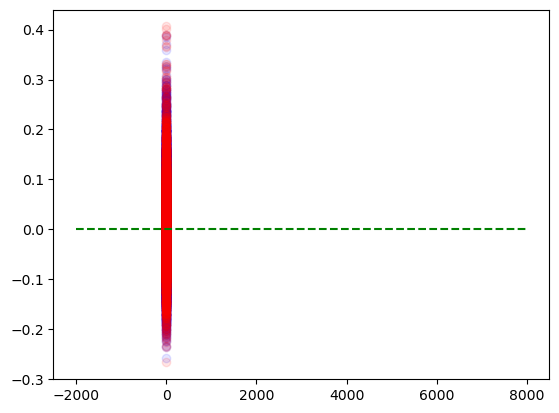

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

from sklearn.ensemble import RandomForestRegressor
lreg = RandomForestRegressor(n_estimators=10,oob_score=True,max_depth=11)
lreg.fit(X_train,y_train)
pred_test = lreg.predict(X_test)
pred_train = lreg.predict(X_train)
train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
plt.hlines(y=0, xmin=-2000, xmax=8000, color='green', linestyle='--')

print("r^2 Train ",r2_score(y_train,pred_train))
print("r^2 Test ",r2_score(y_test,pred_test))

print('MSE Test ',np.mean((pred_test-y_test)**2))
print('MSE Train ',np.mean((pred_train-y_train)**2))

print('MAE Test: ',mean_absolute_error(y_test,pred_test))
print('MAE Train: ',mean_absolute_error(y_train,pred_train))

print('RMSE Test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,pred_train)))

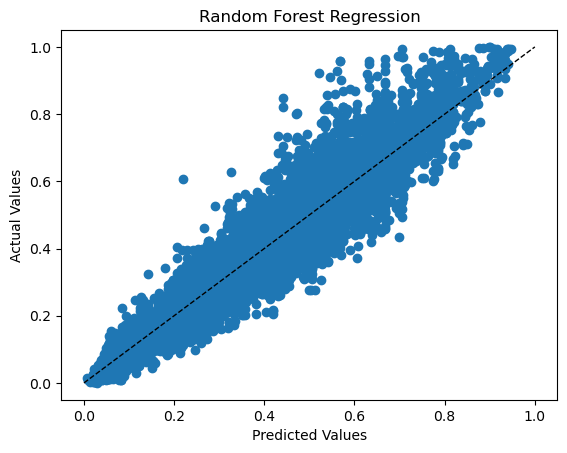

In [16]:
fig, ax = plt.subplots()
ax.scatter(pred_test, y_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Random Forest Regression')
plt.show()


C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


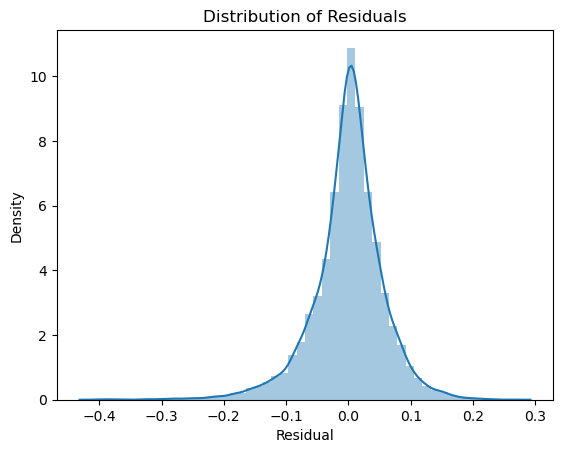

In [17]:
sns.distplot(pred_test- y_test, hist=True, kde=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals');

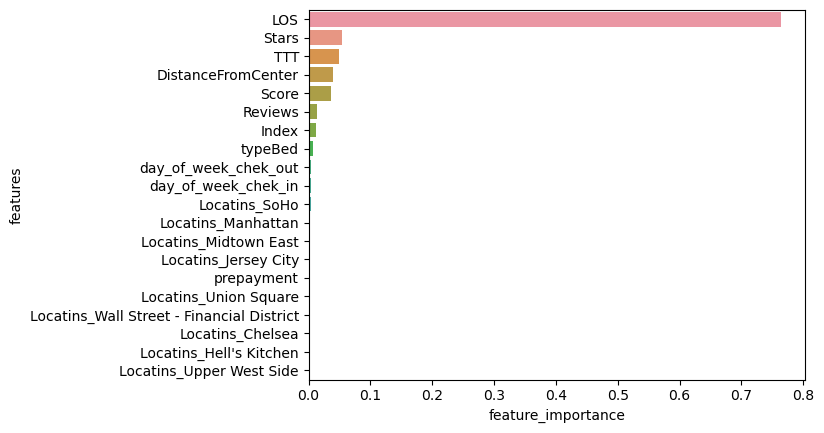

In [18]:
plot_features(X_train.columns, lreg.feature_importances_)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

X_gp_train, X_gp_test, y_gp_train, y_gp_test = train_test_split(X1[['LOS','Reviews','Score','DistanceFromCenter',  'Index']], y1, test_size=0.3,random_state=42)
X_full_gp_train, X_full_gp_test, y_full_gp_train,y_full_gp_test = train_test_split(X_gp_train,y_gp_train,train_size=1000,random_state=42)

In [ ]:
from sklearn.gaussian_process.kernels import RBF
# Create the Gaussian Process Regressor model
Rbf = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
model = GaussianProcessRegressor(kernel=Rbf)

# Train the model
for i in tqdm(range(100)):
    model.fit(X_full_gp_train,y_full_gp_train)
    
# Make predictions on the test set
pred_train = model.predict(X_full_gp_train)
pred_test = model.predict(X_full_gp_test)


mse = mean_squared_error(y_full_gp_test, pred_test)
rmse = mse ** 0.5
gp_model_r2 = r2_score(y_full_gp_test, pred_test)
mae = mean_absolute_error(y_full_gp_test, pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", gp_model_r2)

In [ ]:
mse = mean_squared_error(y_full_gp_test, pred_test)
rmse = mse ** 0.5
gp_model_r2 = r2_score(y_full_gp_test, pred_test)
mae = mean_absolute_error(y_full_gp_test, pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", gp_model_r2)

In [ ]:

sns.distplot(pred_test- y_test, hist=True, kde=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals');

In [ ]:
from sklearn.gaussian_process.kernels import Matern

kernel_matern = Matern(length_scale=1.0, nu=1.5)
model = GaussianProcessRegressor(kernel=kernel_matern)

# Train the model
for i in tqdm(range(100)):
    model.fit(X_full_gp_train,y_full_gp_train)
    
# Make predictions on the test set
pred_train = model.predict(X_full_gp_train)
pred_test = model.predict(X_full_gp_test)


mse = mean_squared_error(y_full_gp_test, y_test_pred)
rmse = mse ** 0.5
gp_model_r2 = r2_score(y_full_gp_test, y_test_pred)
mae = mean_absolute_error(y_full_gp_test, y_test_pred)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", gp_model_r2)

In [ ]:

sns.distplot(pred_test- y_test, hist=True, kde=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals');

In [ ]:
from sklearn.gaussian_process.kernels import RationalQuadratic

kernel_rq = RationalQuadratic(length_scale=1.0, alpha=0.1)
model = GaussianProcessRegressor(kernel=kernel_rq)

# Train the model
for i in tqdm(range(100)):
    model.fit(X_full_gp_train,y_full_gp_train)
    
# Make predictions on the test set
pred_train = model.predict(X_full_gp_train)
pred_test = model.predict(X_full_gp_test)


mse = mean_squared_error(y_full_gp_test, y_test_pred)
rmse = mse ** 0.5
gp_model_r2 = r2_score(y_full_gp_test, y_test_pred)
mae = mean_absolute_error(y_full_gp_test, y_test_pred)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", gp_model_r2)

In [ ]:

sns.distplot(pred_test- y_test, hist=True, kde=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals');

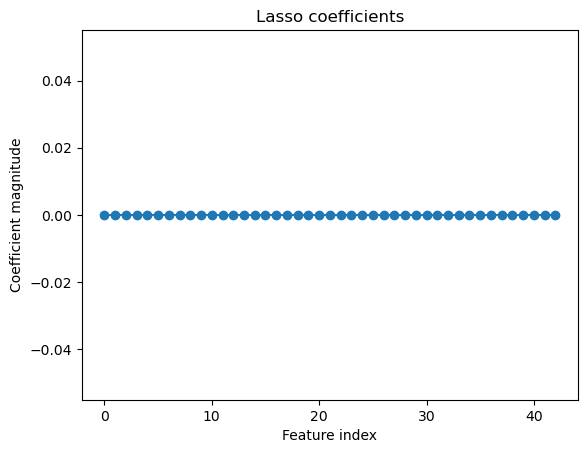

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
coef = lasso.coef_
pred_test = lasso.predict(X_test)
pred_train = lasso.predict(X_train)
plt.plot(coef, marker='o')
plt.xlabel('Feature index')
plt.ylabel('Coefficient magnitude')
plt.title('Lasso coefficients')
plt.show()



r^2 Train  0.0
r^2 Test  -9.930013648240532e-06
MSE Test  0.04545161406792658
MSE Train  0.04520927759936558
MAE Test:  0.17769354592103603
MAE Train:  0.17683046411351805
RMSE Test:  0.2131938415337703
RMSE Train:  0.21262473421350886


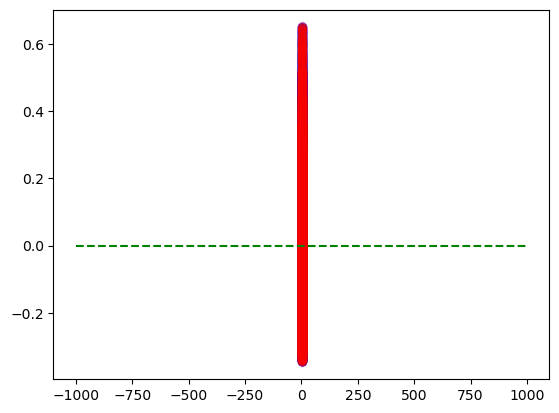

In [20]:
train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
plt.hlines(y=0, xmin=-1000, xmax=1000, color='green', linestyle='--')

print("r^2 Train ",r2_score(y_train,pred_train))
print("r^2 Test ",r2_score(y_test,pred_test))

print('MSE Test ',np.mean((pred_test-y_test)**2))
print('MSE Train ',np.mean((pred_train-y_train)**2))

print('MAE Test: ',mean_absolute_error(y_test,pred_test))
print('MAE Train: ',mean_absolute_error(y_train,pred_train))

print('RMSE Test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,pred_train)))

r^2 Train  0.20017882329261494
r^2 Test  0.2008700936553205
MSE Test  0.03632138342148355
MSE Train  0.03615933760761503
MAE Test:  0.15736180667129773
MAE Train:  0.15658397226436455
RMSE Test:  0.19058169749869322
RMSE Train:  0.19015608748503207


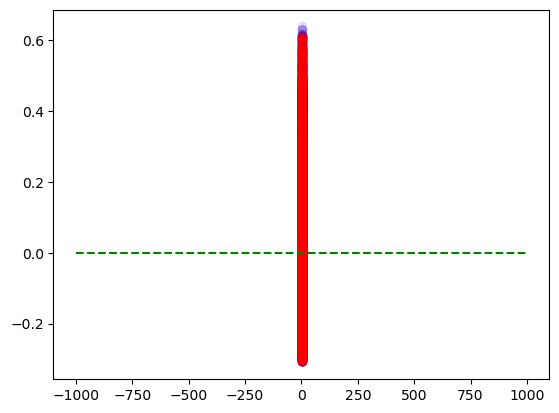

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet

X, y = make_regression(n_samples=70, n_features=50)
en_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)
en_regressor.fit(X_train, y_train)
pred_test = en_regressor.predict(X_test)
pred_train = en_regressor.predict(X_train)

train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
plt.hlines(y=0, xmin=-1000, xmax=1000, color='green', linestyle='--')

print("r^2 Train ",r2_score(y_train,pred_train))
print("r^2 Test ",r2_score(y_test,pred_test))

print('MSE Test ',np.mean((pred_test-y_test)**2))
print('MSE Train ',np.mean((pred_train-y_train)**2))

print('MAE Test: ',mean_absolute_error(y_test,pred_test))
print('MAE Train: ',mean_absolute_error(y_train,pred_train))

print('RMSE Test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,pred_train)))



r^2 Train  0.9327868419257935
r^2 Test  0.9329674246901455
MSE Test  0.0030467084891058482
MSE Train  0.003038658321706832
MAE Test:  0.039425771961438316
MAE Train:  0.03918053800700611
RMSE Test:  0.05519699710225038
RMSE Train:  0.05512402671890741


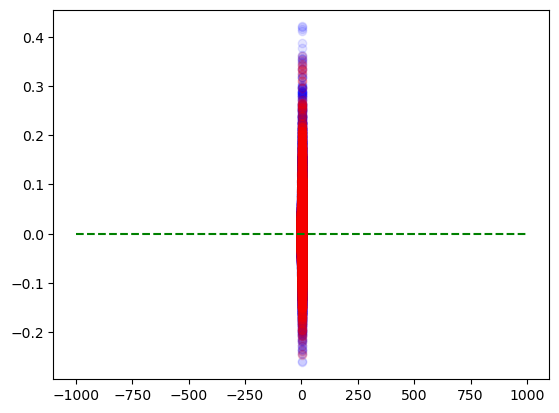

In [22]:
import xgboost as xgb
from xgboost import plot_importance
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = 0.3,max_depth = 5,n_estimators = 50,alpha = 10)
xg_reg.fit(X_train,y_train)

pred_test = xg_reg.predict(X_test)
pred_train = xg_reg.predict(X_train)
train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
plt.hlines(y=0, xmin=-1000, xmax=1000, color='green', linestyle='--')

print("r^2 Train ",r2_score(y_train,pred_train))
print("r^2 Test ",r2_score(y_test,pred_test))

print('MSE Test ',np.mean((pred_test-y_test)**2))
print('MSE Train ',np.mean((pred_train-y_train)**2))

print('MAE Test: ',mean_absolute_error(y_test,pred_test))
print('MAE Train: ',mean_absolute_error(y_train,pred_train))

print('RMSE Test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,pred_train)))

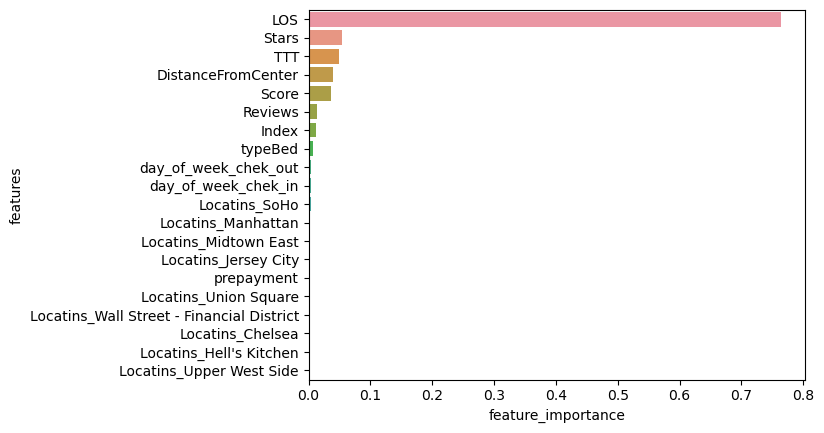

In [23]:
plot_features(X_train.columns, lreg.feature_importances_)